# **AIN 214 - PA2 - FALL 2024**



```
# Bu, kod olarak biçimlendirilmiştir
```

**Student Number** : 2220765032

**Name Surname**   : Yiğit Kaya Bağcı


BELOW MD CELLS CONTAIN THE QUESTIONS YOU ARE ASKED TO IMPLEMENT WITHIN THE CONTEXT OF THIS HW. PLEASE FILL IN THE CELLS FOR THE ANSWERS RIGHT BELOW THE MD CELL OF THE QUESTION. YOU CAN ADD AS MANY CELLS AS YOU WANT, BE IT CODE OR MD, SO LONG AS YOU PROVIDE UNDERSTANDABLE AND TRACEABLE REPORTING. PLEASE ADD COMMENTS ON YOUR CODES. ALSO, FILL IN MD CELLS WHERE YOU ARE ASKED TO COMMENT ON YOUR RESULTS OR EXPLAIN YOUR REASONING. ALSO, PLEASE DO NOT HESITATE TO USE THEM FOR YOUR OWN REPORTING PURPOSES. PLEASE KEEP IN MIND THAT, REPORTING IS A KEY STEP IN DATA SCIENCE.

**Deadline: 08.11.2024 (23:59:59)**

**Submission:** Submit your Jupyter Notebooks via https://submit.cs.hacettepe.edu.tr/

<font color='red'> **!!! PLEASE RUN YOUR CODE.   THE OUTPUT OF YOUR CODE MUST BE VISIBLE. DO NOT DELETE OR HIDE THE OUTPUT.**</font>

# **Necessary Imports**

In [1]:
# Import required libraries
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt


# **PART- 1**

**Set of Questions on Healthcare Management System (60 Pts)**



For this part, you will use a dataset related to a Healthcare Management System. The dataset includes information about patients, doctors, medical procedures, and healthcare operations.



* **Patients**: There are many patients within the healthcare system. The system holds details that help identify the patient, such as the name and email of the patient receiving medical care.

* **Doctors**: Profiles of healthcare professionals within the facility are stored. Each record provides information about the doctor's identity, including name, specialty and contact information, which is crucial for directing patients to appropriate medical services and ensuring effective communication.

* **Appointments**: Tracks all scheduled visits between patients and doctors and serves as a vital component of the health management system. It keeps records of the appointment date and time, the patient and doctor involved and plays a critical role in managing patient flow and optimizing the use of healthcare resources.

* **Medical Procedures**: It is necessary to catalog the various treatments and diagnostic services offered by the healthcare facility. It is essential to provide clarity on the types of medical interventions available, which aids both clinical and financial planning.

* **Billing**: It is important to record all financial transactions related to patient appointments and procedures. It keeps track of the items billed to patients along with their respective amounts, which is crucial for the financial health of the health facility, allowing for accurate monitoring of income and outstanding balances.


This dataset will be used to design a relational database for managing healthcare operations, which includes data about patients, doctors, appointments, and more. Your task is to build an efficient database schema and write SQL queries.

---


**Dataset Path:** "Data/Appointments_procedures.csv, Patient_billing.csv , Doctors.csv"
  
---

**Note:** Use sqite3 python package for DB

---

# **Q1**. Design your schema as tables. Draw the necessary tables with the appropriate attributes. State the primary keys, foreign keys (and their references). Create the tables in your schema in the database. (10 Points)

There is no single soluion here, come up with your own design.

\<**your design here**\>




---


***Example Table***:

| Column   | Type  | Key      | Description                              |
|----------|-------|----------|------------------------------------------|
| ID       | INTEGER| PK      | Unique identifier table1                 |
| ID2      | INTEGER| FK      | identifier table2                        |
| Name     | TEXT   |         | patient name                             |
| FOREIGN KEY (ID2) REFERENCES table2(ID2)     |    |          |         |







In [5]:
# Read csv files.
df_doctors = pd.read_csv("Data/Doctors.csv")
df_patientsbills = pd.read_csv("Data/Patient_billing.csv")
df_appointments_procedures = pd.read_csv("Data/Appointments_procedures.csv")

# Renamed some columns.
df_doctors = df_doctors.rename(columns={
    "DoctorName": "Name",
    "Specialization": "Specialty",
    "DoctorContact": "ContactInfo"
})

df_patientsbills = df_patientsbills.rename(columns={
    "firstname": "Name",
    "lastname": "LastName",
    "email": "ContactInfo"
})

# In Patients tables, arrenged to store PatientID as primary key.
df_unique_patients = df_patientsbills.drop_duplicates(subset='PatientID')


# Created 4 Table as Doctors, Patients, Appointments_Procedures and Bills.
with sqlite3.connect('healthcare.db') as conn:
    cur = conn.cursor()

    cur.execute('''
    CREATE TABLE IF NOT EXISTS Doctors (
        DoctorID INTEGER NOT NULL,
        Name TEXT NOT NULL,
        Specialty TEXT,
        ContactInfo TEXT,
        PRIMARY KEY (DoctorID)
    )
    ''')

    #Filled Doctors table.
    df_doctors[['DoctorID', 'Name', 'Specialty', 'ContactInfo']].to_sql('Doctors', conn, if_exists='replace', index=False)

    cur.execute('''
    CREATE TABLE IF NOT EXISTS Patients(
        PatientID INTEGER NOT NULL,
        Name TEXT,
        LastName TEXT,
        ContactInfo TEXT,
        PRIMARY KEY (PatientID)
    )
    ''')

    #Filled Patients table.
    df_unique_patients[['PatientID', 'Name', 'LastName', 'ContactInfo']].to_sql('Patients', conn, if_exists='replace', index=False)

    cur.execute('''
    CREATE TABLE IF NOT EXISTS Appointments_Procedures (
        PatientID INTEGER,
        DoctorID INTEGER,
        ProcedureID INTEGER,
        ProcedureName TEXT,
        Date TEXT,
        Time TEXT,
        PRIMARY KEY (ProcedureID),
        FOREIGN KEY (PatientID) REFERENCES Patients(PatientID),
        FOREIGN KEY (DoctorID) REFERENCES Doctors(DoctorID)
      )''')

    #Filled Appointments_Procedures table.
    df_appointments_procedures[['ProcedureID', 'PatientID', 'DoctorID', 'ProcedureName', 'Date', 'Time']].to_sql('Appointments_Procedures', conn, if_exists='replace', index=False)

    cur.execute('''
    CREATE TABLE IF NOT EXISTS Bills(
      InvoiceID INTEGER PRIMARY KEY,
      PatientID INTEGER ,
      Items TEXT,
      Amount INTEGER,
      FOREIGN KEY (PatientID) REFERENCES Patients(PatientID)
    )
    ''')

    #Filled Bills table.
    df_patientsbills[['PatientID', 'InvoiceID', 'Amount', 'Items']].to_sql('Bills', conn, if_exists='replace', index=False)

# **Q2**.  Write a SQL query that retrieves the top 5 doctors based on the total number of appointments they have conducted. The results should include each doctor's doctor_id, doctor_name, and the corresponding total_appointments they have handled.(10 Points)

In [7]:
# Appoinments_Procedures and Doctors are linked, Grouped by doctors in id and name.
# Finally selected doctors which have maximum appoinment numbers.

cur.execute('''
SELECT d.DoctorID, d.Name AS DoctorName, COUNT(*) AS total_appointments
FROM Doctors d, Appointments_Procedures a
WHERE d.DoctorID = a.DoctorID
GROUP BY d.DoctorID, d.Name
ORDER BY total_appointments DESC
LIMIT 5;
''')

all = cur.fetchall()

df = pd.DataFrame(all, columns=['DoctorID', 'DoctorName', 'total_appointments'])

df

,DoctorID,DoctorName,total_appointments
0,548,Karlee,6
1,417,Molli,5
2,527,Cristabel,5
3,637,Lorenza,5
4,925,Hyacinthe,5


# **Q3**.  Calculates the total billing amount for each patient. The output should present each patient's patient_id, first_name, last_name, and the total_billed_amount. List the amount of the bill in descending order.(10 Points)

In [8]:
# Bills and Patients tables are connected on PatientID. Grouped by patients and ordered by total_billed amount.

cur.execute('''
SELECT p.PatientID, p.Name, p.LastName, SUM(Amount) AS total_billed_amount, Count(*)
FROM Patients p, Bills b
WHERE p.PatientID = b.PatientID
GROUP BY b.PatientID
ORDER BY total_billed_amount DESC
''')

all = cur.fetchall()

df = pd.DataFrame(all, columns=['PatientID', 'Name', 'LastName' , 'total_billed_amount', 'Count'])

df

,PatientID,Name,LastName,total_billed_amount,Count
0,733,Lesly,Arquit,4035149,6
1,368,Stephanie,Agle,3436703,4
2,779,Candi,Shaver,3283643,5
3,240,Margette,Belldas,2800003,4
4,242,Frieda,Bonilla,2286000,4
...,...,...,...,...,...
404,509,Frances,Lipson,21661,1
405,298,Chere,Dom,20564,1
406,921,Gavrielle,Kellby,16767,1
407,827,Mureil,Oriana,16567,1


# **Q4**. Write a SQL query to find the most common medical procedures for every doctor. The result should include the doctor_id, doctor_name, procedure_name, and the count of how many times each procedure has been performed (procedure_count). (10 Points)

In [34]:
#First, doctors are grouped, and then for each grouped doctor,
#the procedure count is checked to be equal to the maximum count in the subquery.
# And to better show doctors are ordered by procedure_count.

cur.execute('''
SELECT d.DoctorID, d.Name AS DoctorName, a.ProcedureName, COUNT(*) AS procedure_count
FROM Doctors d
JOIN Appointments_Procedures a
ON d.DoctorID = a.DoctorID
GROUP BY d.DoctorID, a.ProcedureName
HAVING COUNT(*) = (SELECT MAX(subcount)
                  FROM ( SELECT COUNT(*) AS subcount
                  FROM Appointments_Procedures a2
                  WHERE a2.DoctorID = d.DoctorID
                      GROUP BY a2.ProcedureName))
ORDER BY procedure_count''')

all = cur.fetchall()

df = pd.DataFrame(all, columns=['DoctorID', 'DoctorName', 'ProcedureName', 'Count'])

df

,DoctorID,DoctorName,ProcedureName,Count
0,101,Mireielle,General surgery,1
1,117,Karena,Anesthetic care during childbirth,1
2,117,Karena,Angioplasty and stent placement,1
3,117,Karena,Orthopedic surgery,1
4,119,Flory,Pediatric surgery,1
...,...,...,...,...
270,439,Noelle,"X-rays, CT scans, MRI scans",2
271,637,Lorenza,Interventional radiology procedures,2
272,688,Constance,Surgical oncology,2
273,925,Hyacinthe,General health check-ups,2


# **Q5**. Calculate the total revenue generated by each doctor from the procedures they have performed. The output should display the doctor_id, first_name and the total revenue (total_revenue) attributed to each doctor. (10 Points)

In [36]:
# In this query, 3 tables are linked together. Doctors and Appoitments_Procedures tables are connected on DoctorID
# and Doctors and Bills are connected on PatientID. So, 3 tables are linked and finally grouped doctors.

cur.execute('''
SELECT d.DoctorID,d.Name AS DoctorName,SUM(b.Amount) AS total_amount
FROM Doctors d
JOIN Appointments_Procedures a ON d.DoctorID = a.DoctorID
JOIN Bills b ON b.PatientID = a.PatientID
GROUP BY d.DoctorID, d.Name
ORDER BY total_amount DESC;
''')

all = cur.fetchall()

df = pd.DataFrame(all, columns=['DoctorID', 'DoctorName', 'Total_Amount'])

df

,DoctorID,DoctorName,Total_Amount
0,452,Minne,7029997
1,189,Max,6567286
2,617,Charissa,5473767
3,975,Hettie,4347878
4,558,Adriana,3759756
...,...,...,...
86,222,Zia,144135
87,266,Tera,133113
88,203,Kore,118150
89,155,Alleen,114657


# **Q6.** Identify patients who have had multiple appointments. The query should return the patient_id, first_name, last_name, and appointment_count. List the appointment_count in descending order. (10 Points)

In [38]:
# Linked Appointments_Procedures and Patient tables on PatientID.
# Grouped Patients and finally selected patients which have multiple appointment by looking group counts.

cur.execute('''
SELECT a.PatientID, p.Name, p.LastName, Count(*) AS appointment_count
FROM Appointments_Procedures a
JOIN Patients p
ON p.PatientID = a.PatientID
GROUP BY a.PatientID
HAVING Count(*) > 1
ORDER BY appointment_count DESC
''')

all = cur.fetchall()

df = pd.DataFrame(all, columns=['PatientID', 'Name', 'LastName', 'Count'])

df

,PatientID,Name,LastName,Count
0,870,Carolina,Carbo,6
1,696,Grier,Noam,5
2,613,Zia,Wildermuth,5
3,469,Ashlee,Annabella,5
4,368,Stephanie,Agle,5
5,977,Carree,Bach,4
6,717,Tybie,Latini,4
7,381,Chickie,Hazlett,4
8,190,Amara,Sawtelle,4
9,149,Drucie,Nedrud,4


# **PART- 2**

**Set of Questions : DATA ANALYSIS WITH VISUALIZATION TOOLS** **(40 Pts)**

Answer the following questions, using visualization tools, and comment on your work.

---

**Dataset Path**: "Data/Suicides.csv"

---



# **Q1.** Create a pivot table showing the average suicide rate by country and year.  Which countries have the highest and lowest average suicide rates over the years? Analyze the data using this graph.(8 Points)

In [39]:
# Reading Suicides csv
df_suicides = pd.read_csv("Data/Suicides.csv")


# Creating pivot table with country and year columns. Also selected values as suicides per 100k vals.
piv_tab = df_suicides.pivot_table(index = "country", columns = "year", values= "suicides/100k pop")


# Finding mean values from pivot table.
country_avg = piv_tab.mean(axis=1)

# Finded highest countries which have maximum suicide rate by sorting values in reverse.
highest_avg = country_avg.sort_values(ascending=False).head(10)
highest_avg

,0
country,
Lithuania,40.383424
Sri Lanka,35.295152
Russian Federation,34.892377
Hungary,32.706212
Belarus,31.075913
Kazakhstan,30.511282
Latvia,29.259325
Slovenia,27.827857
Estonia,27.276905


In [25]:
# Finded lowest average countries which have minimum suicide rate by sorting values.

lowest_avg = country_avg.sort_values(ascending=True).head(10)
lowest_avg

,0
country,
Saint Kitts and Nevis,0.000000
Dominica,0.000000
Jamaica,0.521765
Antigua and Barbuda,0.552901
Oman,0.736111
South Africa,0.964542
Kuwait,1.186433
Bahamas,1.247391
United Arab Emirates,1.317917


# **Q2**. Create a histogram to visualize the distribution of suicide rates. What is the most common range of suicide rates across countries? Comment on the findings about this graph.(8 Points)

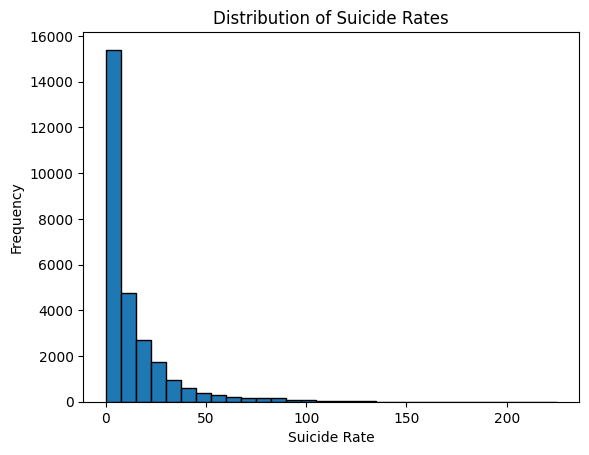

In [ ]:
# Drop any NaN values from the suicides/100k pop column.
suicides_rates = df_suicides['suicides/100k pop'].dropna()

# Create a histogram of suicide rates with 30 bins.
plt.hist(suicides_rates, bins=30, edgecolor='black')


# Set the title and labels for the histogram
plt.title('Distribution of Suicide Rates')
plt.xlabel('Suicide Rate')
plt.ylabel('Frequency')

# Displaying histogram
plt.show()


In [ ]:
"INFERENCE"
"""
Most countries have low suicide rates, between 0-10 per 100,000 people,
and very few have high rates. Overall, the chart shows that while most places experience low rates,
some areas have much higher rates, suggesting that certain regions might face unique factors.
"""

# **Q3**. Using a pie chart , show the proportion of total suicides by gender for the most recent year available in the dataset. How do suicide rates differ between genders? Comment about your findings. (8 Points)

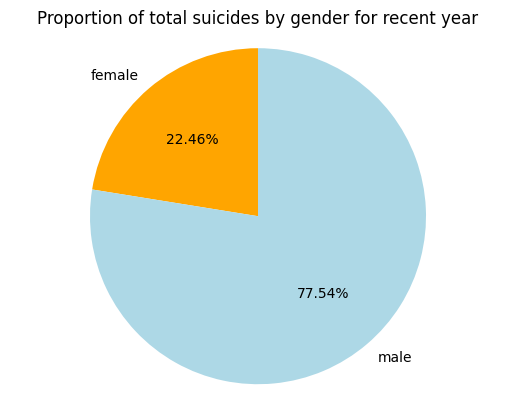

In [26]:
# Find the most recent year in the dataset
recent_year = df_suicides['year'].max()

# Filter to recent year.
condition = (df_suicides['year'] == recent_year)

# Group the filtered data by gender and sum the suicide counts for each gender
grouped_data = df_suicides[condition].groupby('sex')['suicides_no'].sum()

# Selecting colors.
colors = ['orange', 'lightblue']

# Plot the pie chart showing the proportion of suicides by gender
plt.title('Proportion of total suicides by gender for recent year')
plt.pie(grouped_data.values, colors = colors,labels=grouped_data.index, autopct='%1.2f%%', startangle=90)
plt.axis('equal')
plt.show()

In [ ]:
"INFERENCE"
'''
The pie chart shows that males represent 77.5% of total suicide cases,
while females account for 22.5%. This suggests that suicide rates are
significantly higher among males compared to females.
'''

# **Q4**. Create a scatter plot showing the relationship between GDP per capita and suicide rate. Is there a correlation between a country's wealth (GDP per capita) and its suicide rates? Comment on any correlations or patterns you observe.(8 Points)

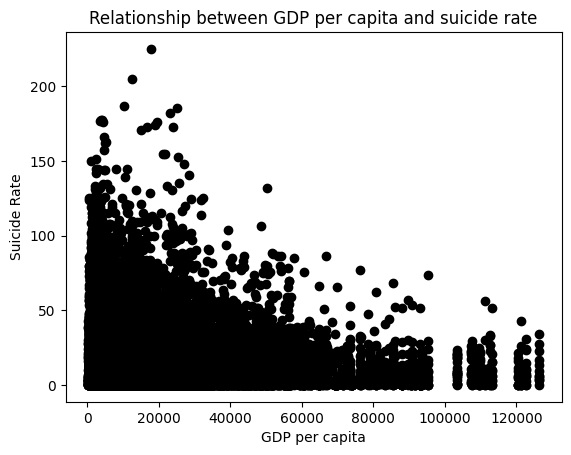

In [40]:
# Drop rows with Null values in gdp_per_capita ($) and suicides/100k pop columns.
df_scatter = df_suicides.dropna(subset=['gdp_per_capita ($)', 'suicides/100k pop'])

# Adjust GDP per capita as the x-axis and suicide rate as the y-axis
x_axis = df_scatter['gdp_per_capita ($)']
y_axis = df_scatter['suicides/100k pop']

# Plot a scatter plot to show the relationship
plt.scatter(x_axis, y_axis, color = 'black')
plt.title('Relationship between GDP per capita and suicide rate')
plt.xlabel('GDP per capita')
plt.ylabel('Suicide Rate')
plt.show()

In [ ]:
'INFERENCE'
'''
İt is deduced form scatter plot that there is a correlation between GDP per capita and suicide rate.
Observing from left to right in plot, it appears that countries with higher GDP per capita
tend to have higher suicide rate. Also it is inferred that economy is related to suicide rate.
'''

'INFERENCE'

# **Q5.** Using  a bar chart, illustrating the top 10 countries with the highest suicide rates. Comment about the findings from this graph. (8 Points)

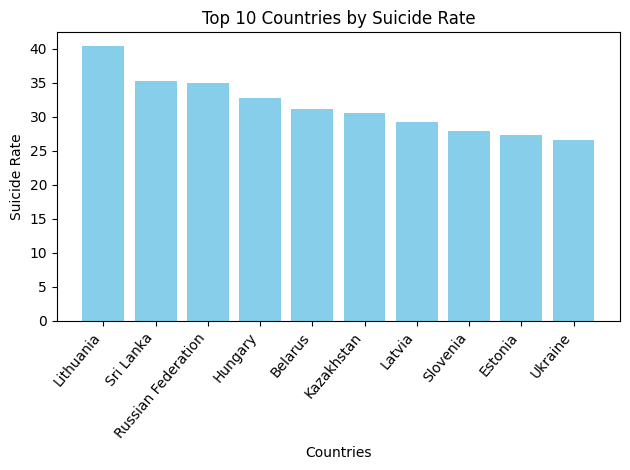

In [28]:
# highest_avg variable from first analysis which is top 10 countries with highest suicide rates.

# Create a bar chart for the top 10 countries by suicide rate
plt.bar(highest_avg.index, highest_avg.values, color='skyblue')

# Set the title and axis labels
plt.title('Top 10 Countries by Suicide Rate')
plt.xlabel('Countries')
plt.ylabel('Suicide Rate')

# Rotating the x axis and adjusting the layout.
plt.xticks(rotation=50, ha='right')
plt.tight_layout()

# Displaying bar chart.
plt.show()

In [ ]:
'INFERENCE'
'''
Although Lithuania comes first in the graph with the highest value,the values of all countries are
close to each other. The graph also shows that countries that were once under the influence of the
Soviet Union or that are close to Russia have high suicide rates.
'''

# SUBMIT FORMAT

* **<-zip>**
  - **studentID_name_surname_hw2.ipynb**


# PLAGIARISM

All work on assignments must be done individually. You are encouraged to discuss the given assignments with your classmates, but these discussions should be carried out in an abstract way. That is, discussions related to a particular solution to a specific probem (either in actual code or in pseudocode) will not be tolerated. In short, turning in someone else’s work (including work available on the internet), in whole or in part, as your own will be considered as a violation of academic integrity. Please note that the former conditions also hold for the material attained using AI tools, including ChatGPT, GitHub Copilot, etc.